<a href="https://colab.research.google.com/github/lucianoselimaj/MLDL_Labs/blob/main/Lab01_Ex02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### PyTorch DataLoader Exercises

Welcome to the PyTorchDataLoader exercise template notebook.

There are several questions in this notebook and it's your goal to answer them by writing Python and PyTorch code.

> **Note:** There may be more than one solution to each of the exercises, don't worry too much about the *exact* right answer. Try to write some code that works first and then improve it if you can.



What is the purpose of this code?

the code does three main things:
1.   Download and extract the Tiny img dataset
2.   Prepare the dataset for training a deep learning model
3.   Visualize some sample images from the dataset

In this case, we are working with Tiny ImageNet, a dataset with 200 categories (classes) of images, where each image is 64x64 pixels in size.



Download and extraction complete!
Number of classes: 200
Number of samples: 100000


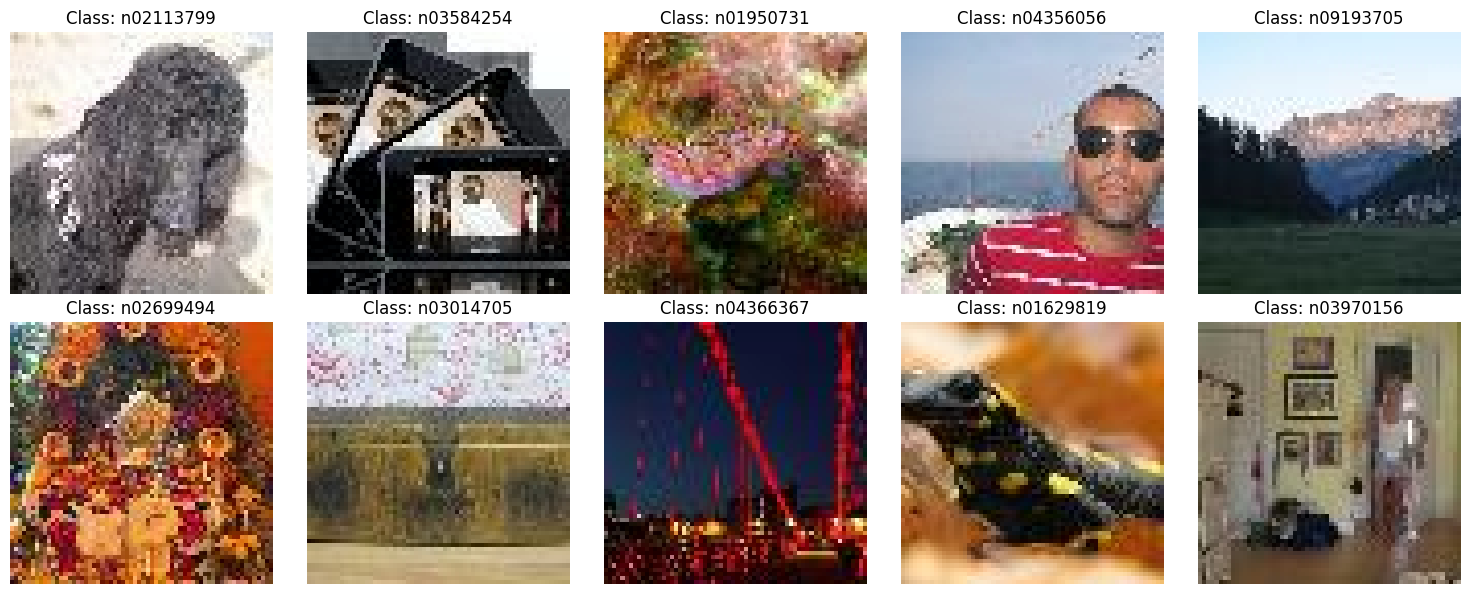

In [8]:
# Import necessary libraries
import os #handles file paths and directories
import torch
import torchvision # provides datasets and images transformations
import torchvision.transforms as transforms # image processing (resizing, normalizing, etc..)
from torch.utils.data import DataLoader # Loads efficiently the dataset in batches for training
from torchvision.datasets import ImageFolder #access to standard image datasets
import matplotlib.pyplot as plt
import requests #Fetches the dataset from a url
from zipfile import ZipFile # Handles extracting dataset
from io import BytesIO # Handles extracting dataset
import numpy as np

# Define the path to the dataset
dataset_path = 'http://cs231n.stanford.edu/tiny-imagenet-200.zip'  # Replace with the path to your dataset

# Send a GET request to the URL, in other words the line is downloading the dataset
response = requests.get(dataset_path)
# Check if the request was successful
if response.status_code == 200:
    # Open the downloaded bytes and extract them
    #ZipFile is used for the extraction, because the dataset is .zip, while BytesIO handle the file as a stream of data in memory
    with ZipFile(BytesIO(response.content)) as zip_file:
        zip_file.extractall('/dataset') # extract all under the directory
    print('Download and extraction complete!')

# Define transformations for the dataset
"""
Preprocess the images before feeding them into a Deep Learning Model
Resizing --> all images with the same dimension
Tensor COnversion --> convert inmages into PyTorch tensord
Normalization --> Standardize pixel values ( [0,1] or [-1,1]) this help models converge faster
"""

#Build the transformer, compose is used for multiple transformation
transform = transforms.Compose([
    #Resizes all images to 64x64 pixels to maintain uniformity
    transforms.Resize((64,64)),
    #Converts the image into a PyTorch tensor (which is like an array)
    #Changes pixel values from [0, 255] to [0, 1] for better numerical stability
    transforms.ToTensor(),
    #Normalizes the image data to match the statistics of pre-trained models
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])

# Load the dataset
"""
ImageFolder is a PyTorch dataset class designed for image classification.
It expects a folder structure where each subfolder represents a class.

Then we apply the transformation
"""
tiny_imagenet_dataset_train = ImageFolder(root='/dataset/tiny-imagenet-200/train', transform=transform)
tiny_imagenet_dataset_test = ImageFolder(root='/dataset/tiny-imagenet-200/test', transform=transform)

# Create a DataLoader
#Loads 64 images at a time (instead of one by one, which is slower)
dataloader_train = DataLoader(tiny_imagenet_dataset_train, batch_size=64, shuffle=True)
dataloader_test = DataLoader(tiny_imagenet_dataset_test, batch_size=64, shuffle=False)

# Determine the number of classes and samples
num_classes = len(tiny_imagenet_dataset_train.classes) #List of all classes (categories) in the dataset.
num_samples = len(tiny_imagenet_dataset_train) #Counts the total number of images in the dataset.

print(f'Number of classes: {num_classes}')
print(f'Number of samples: {num_samples}')

# Function to denormalize image for visualization
def denormalize(image):
    image = image.to('cpu').numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    image = image * std + mean
    image = np.clip(image, 0, 1)
    return image

# Visualize one example for each class for 10 classes
# Create a 2-row, 5-column grid for displaying images
fig, axes = plt.subplots(2, 5, figsize=(15, 6))

# Keep track of sampled classes to ensure uniqueness
classes_sampled = set()

# Map class index to class name
idx_to_class = {v: k for k, v in tiny_imagenet_dataset_train.class_to_idx.items()}

# Loop through the DataLoader to get batches of images and labels
for images, labels in dataloader_train:
    for img, label in zip(images, labels):
        if label.item() not in classes_sampled:
            ax = axes.flat[len(classes_sampled)]
            img_np = denormalize(img)
            ax.imshow(img_np)
            ax.set_title(f'Class: {idx_to_class[label.item()]}')  # Now idx_to_class is defined
            ax.axis('off')
            classes_sampled.add(label.item())

        if len(classes_sampled) == 10:
            break
    if len(classes_sampled) == 10:
        break

plt.tight_layout()
plt.show()
